In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

# Open model

In [2]:
with open("rf_model.pkl","rb") as f:
    rf_model = pickle.load(f)

# Test inference on training dataset. This is just for illustration!

In [3]:
train = np.loadtxt("train.txt")
Y = train[:, 0]
X = train[:, 1:9] # 1: for all, 1:9 for no wind feature.

In [4]:
X_inf = X[0:100,:]

In [6]:
%%time
Y_inf = rf_model.predict(X_inf)

CPU times: user 23.2 ms, sys: 9.95 ms, total: 33.1 ms
Wall time: 35.1 ms


(array([ 1.,  0.,  0.,  1.,  3., 25., 58., 10.,  1.,  1.]),
 array([-0.22705585, -0.19043511, -0.15381437, -0.11719362, -0.08057288,
        -0.04395214, -0.00733139,  0.02928935,  0.06591009,  0.10253083,
         0.13915158]),
 <BarContainer object of 10 artists>)

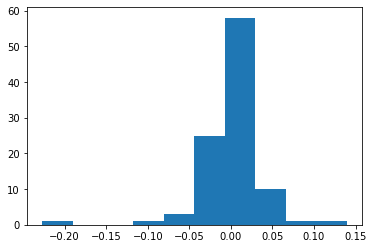

In [9]:
plt.hist(Y_inf)